In [68]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as st
import numpy as np
import seaborn as sns

# File to Load (Remember to Change These)
file = "kaggleData/student-mat.csv"

# Read Purchasing File and store into Pandas data frame
df = pd.read_csv(file)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


# Travel Time and Academics

In [69]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [70]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [71]:
traveltime_group = pd.DataFrame(df.traveltime.value_counts())
traveltime_group

,traveltime
1,257
2,107
3,23
4,8


In [140]:
colors=["#9AA0A8","#A7C4B5","#0B4F6C","#AF1B3F"]
sns.set_palette(sns.color_palette(colors))

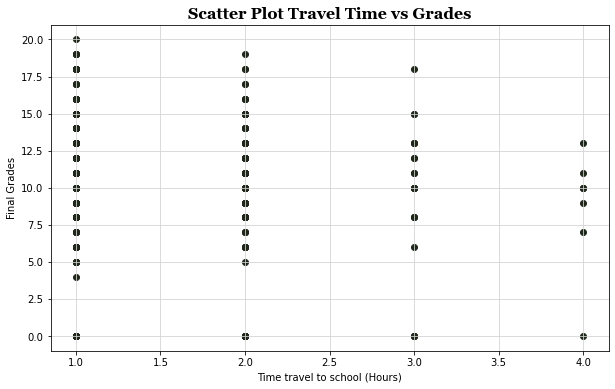

In [141]:
#scatterplot:
plt.figure(figsize = (10,6))
plt.scatter(df.traveltime, df.G3, color = "#1F271B")
plt.title("Scatter Plot Travel Time vs Grades", fontsize = 16, fontweight ="bold", fontname ="Georgia" )
plt.xlabel('Time travel to school (Hours)')
plt.grid(color= 'lightgrey')
plt.ylabel("Final Grades")
plt.show()

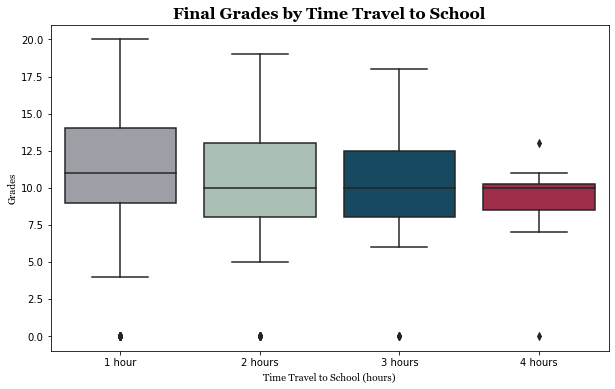

In [161]:
#boxplot:
plt.figure(figsize=(10,6))
sns.boxplot(df.traveltime,df.G3, palette = colors)
plt.title('Final Grades by Time Travel to School', fontsize = 16, fontweight ="bold", fontname ="Georgia" )
plt.ylabel('Grades', fontname ="Georgia")
plt.xlabel('Time Travel to School (hours)',fontname ="Georgia")
plt.xticks([0,1,2,3],["1 hour", "2 hours", "3 hours", "4 hours"])
# plt.grid(color = 'lightgrey')
plt.show()

Text(0.5, 0, 'Time Travel to School (hours)')

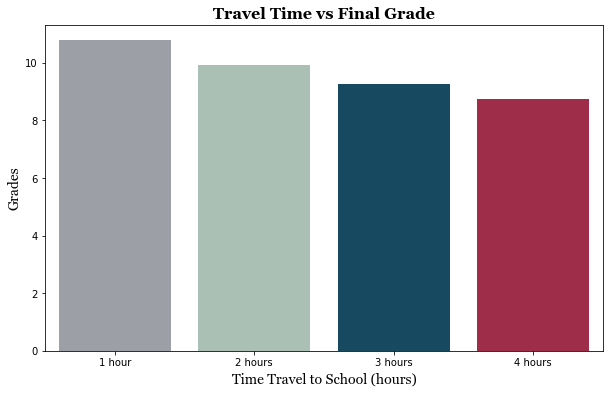

In [158]:
g = df.groupby('traveltime')

x = list(g.groups.keys())
y = list(df.groupby('traveltime')["G3"].mean())
plt.figure(figsize =(10,6))
sns.barplot(x, y, palette = colors)
plt.xticks([0,1,2,3],["1 hour", "2 hours", "3 hours", "4 hours"])
plt.title('Travel Time vs Final Grade',fontsize = 16, fontweight ="bold", fontname ="Georgia" )
plt.ylabel('Grades',fontsize = 14, fontname ="Georgia")
plt.xlabel('Time Travel to School (hours)',fontsize = 14, fontname ="Georgia")

# Study Time and Academics

In [74]:
studytime_group = pd.DataFrame(df.studytime.value_counts())
studytime_group

,studytime
2,198
1,105
3,65
4,27


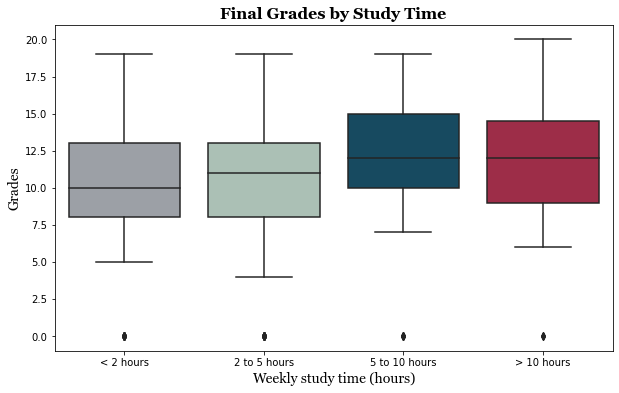

In [163]:
plt.figure(figsize=(10,6))

sns.boxplot(df.studytime, df.G3, palette = colors)
plt.title('Final Grades by Study Time',fontsize = 16, fontweight ="bold", fontname ="Georgia" )
plt.ylabel('Grades',fontsize = 14, fontname ="Georgia")
plt.xlabel('Weekly study time (hours)',fontsize = 14, fontname ="Georgia")
plt.xticks([0,1,2,3],["< 2 hours", "2 to 5 hours", "5 to 10 hours", "> 10 hours"])
plt.show()

Text(0.5, 0, 'Study Time per Week (hours)')

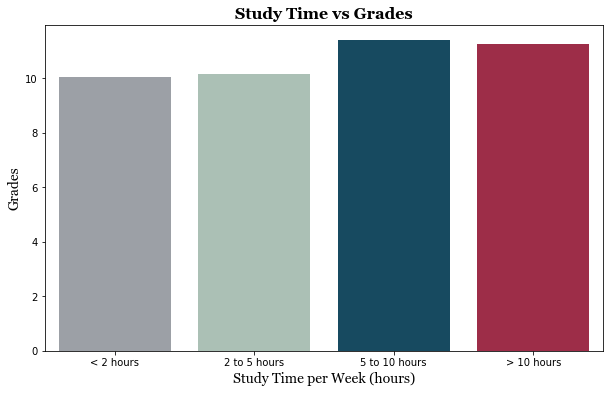

In [166]:
g = df.groupby('studytime')
x = list(g.groups.keys())
y = list(df.groupby('studytime')["G3"].mean())

plt.figure(figsize =(10,6))

sns.barplot(x, y, palette = colors)
plt.xticks([0,1,2,3],["< 2 hours", "2 to 5 hours", "5 to 10 hours", "> 10 hours"])
plt.title('Study Time vs Grades',fontsize = 16, fontweight ="bold", fontname ="Georgia" )
plt.ylabel('Grades', fontsize = 14, fontname ="Georgia")
plt.xlabel('Study Time per Week (hours)', fontsize = 14, fontname ="Georgia")

# Internet on Academics

In [77]:
df.groupby("internet")["G3"].mean()

internet
no      9.409091
yes    10.617021
Name: G3, dtype: float64

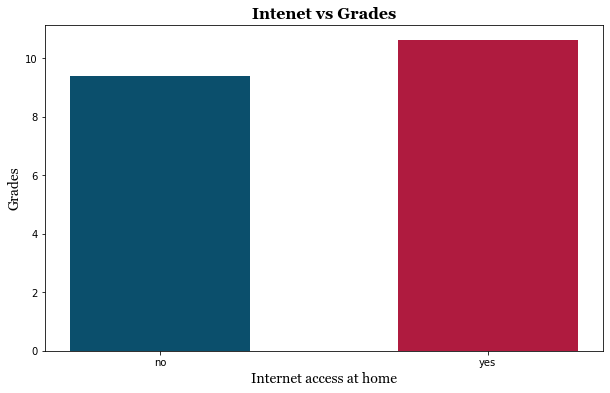

In [89]:
g = df.groupby('internet')
x = g.groups.keys()
y = df.groupby('internet')["G3"].mean()
plt.figure(figsize =(10,6))

plt.bar(x, y, alpha=1, align="center", color = ["#0B4F6C","#AF1B3F"], width = 0.55)
plt.title('Intenet vs Grades',size = 16, fontweight ="bold", fontname ="Georgia" )
plt.ylabel('Grades',size = 14, fontname ="Georgia")
plt.xlabel('Internet access at home',size = 14, fontname ="Georgia")
plt.show()

# Romantic Relationship on Academics

In [79]:
df.groupby("romantic")["G3"].mean()

romantic
no     10.836502
yes     9.575758
Name: G3, dtype: float64

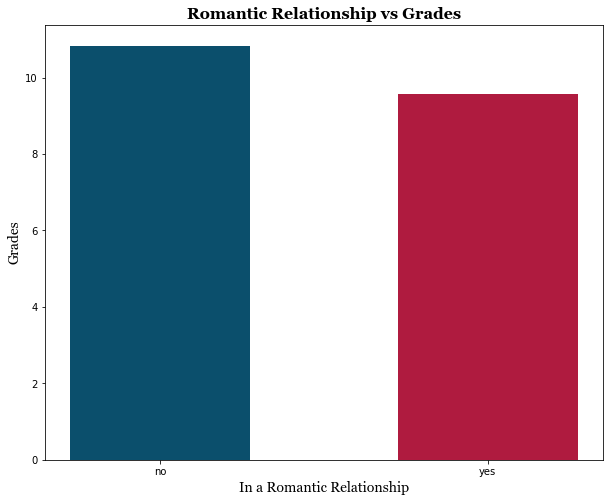

In [88]:
g = df.groupby('romantic')
x = g.groups.keys()
y = df.groupby('romantic')["G3"].mean()
plt.figure(figsize =(10,8))

plt.bar(x, y, alpha=1, align="center", color = ["#0B4F6C","#AF1B3F"], width = 0.55)
plt.title('Romantic Relationship vs Grades', size = 16, fontweight ="bold", fontname ="Georgia" )
plt.ylabel('Grades',size = 14, fontname ="Georgia")
plt.xlabel('In a Romantic Relationship',size = 14, fontname ="Georgia")
plt.xlim=(-10, len(x)+2)
plt.show()

In [81]:
df["sex"].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [102]:
df_Female =pd.DataFrame(df.loc[df.sex=="F"])
df_Male =pd.DataFrame(df.loc[df.sex=="M"])
female_list = list(df_Female.groupby('romantic')["G3"].mean())
male_list = list(df_Male.groupby('romantic')["G3"].mean())
gen_roman = pd.DataFrame()
gen_roman["Male"] = male_list
gen_roman["Female"] = female_list
gen_roman
gen_romanT = gen_roman.transpose()
gen_romanT["No"] = gen_romanT[0]
gen_romanT["Yes"] = gen_romanT[1]
gen_roman_Clean = gen_romanT[["No", "Yes"]]
gen_roman_round = gen_roman_Clean.round(decimals=2)
gen_roman_round

,No,Yes
Male,11.11,10.42
Female,10.55,9.01


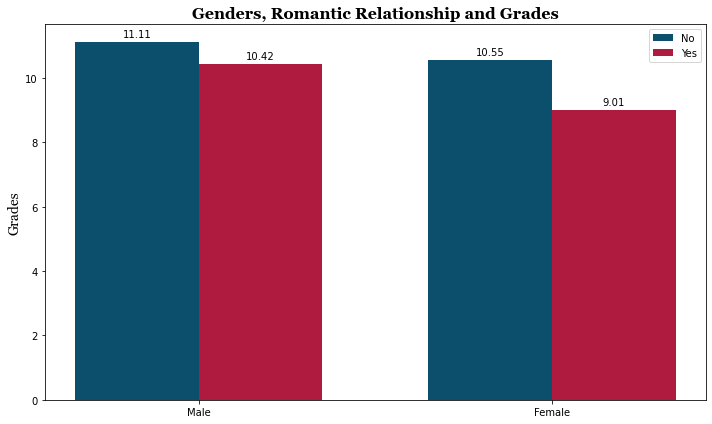

In [105]:
labels = ['Male', 'Female']
no_means = gen_roman_round.No
yes_means = gen_roman_round.Yes

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))

rects1 = ax.bar(x - width/2, no_means, width, label='No', color = "#0B4F6C")
rects2 = ax.bar(x + width/2, yes_means, width, label='Yes', color = "#AF1B3F")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Grades',size = 14, fontname ="Georgia" )
ax.set_title('Genders, Romantic Relationship and Grades', size = 16, fontweight ="bold", fontname ="Georgia")

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()